A student asked about "clustering categorical variables". I don't entirely agree with using KModes over my own intuition with most datasets where features are coherent, but I ran a test to demonstrate what it can do. It can be useful if there is a large featureset, but I still don't like how inexact the results are- it's a big risk to take.

In [103]:
dataset = ['apple','bear','pear','peach','plum','apple','bear','pear','peach','plum']
dataset2 = ['eat','drink','punch','sing','bring','sing','bring','sing','bring','sing']
dataset3 = ['a','a','b','b','c','c','d','d','e','e']

In [104]:
import pandas as pd
pdf = pd.DataFrame(data={'d1':dataset,'d2':dataset2,'d3':dataset3})

In [ ]:
!pip install kmodes
!pip install --upgrade kmodes

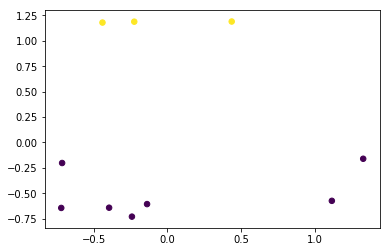

In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
from kmodes import kmodes
import numpy as np

df_dummy = pd.get_dummies(pdf)

#transform into numpy array
x = df_dummy.reset_index().values

km = kmodes.KModes(n_clusters=2, n_init=2, init='Huang')

#km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0,random_state=42)
clusters = km.fit_predict(x)
df_dummy['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy)

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"], s=30)
plt.show()

In [106]:
df_dummy

,d1_apple,d1_bear,d1_peach,d1_pear,d1_plum,d2_bring,d2_drink,d2_eat,d2_punch,d2_sing,d3_a,d3_b,d3_c,d3_d,d3_e,clusters
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
7,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
8,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1
9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
